<a href="https://colab.research.google.com/github/zack060/Steam-Dataset-Analyst/blob/main/Do_Viet_Phuc_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT THE DATASET & INTRODUCTION ABOUT THE DATASET

Introduction about the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as sdk
import matplotlib.patches as mpatches

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Final Coderschool/steam.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [ ]:
pd.set_option('display.max_columns', None)

#CLEAN DATA

In [ ]:
#Create a threshold for selection of 99% of data
threshold = 1

threshold_cumsum = 99

In [ ]:
#Convert date to date-time
df["release_date"] = pd.to_datetime(df["release_date"])

###CATEGORICAL ANALYSIS

####Clean the CATEGORY DATA

In [ ]:
#Count the occurrences of each category
categories = [category for category_list in df['categories'].str.split(';') for category in category_list]

category_counts = pd.Series(categories).value_counts()
category_counts

Single-player                 25678
Steam Achievements            14130
Steam Trading Cards            7918
Steam Cloud                    7219
Full controller support        5695
Partial Controller Support     4234
Multi-player                   3974
Steam Leaderboards             3439
Online Multi-Player            2487
Shared/Split Screen            2152
Stats                          1878
Co-op                          1721
Local Multi-Player             1615
Cross-Platform Multiplayer     1081
Online Co-op                   1071
Local Co-op                    1059
Includes level editor          1036
Steam Workshop                  897
Captions available              721
In-App Purchases                690
MMO                             421
VR Support                      231
Commentary available            144
Valve Anti-Cheat enabled         94
Steam Turn Notifications         63
SteamVR Collectibles             40
Includes Source SDK              35
Mods                        

In [ ]:
category_counts.count()

29

In [ ]:
#Total number of all categories combine
total_categories_combined = len(categories)

In [ ]:
#Get the percentage of each category
category_counts.reset_index()
category_percentage = (category_counts / total_categories_combined ) * 100

category_percentage

Single-player                 28.618238
Steam Achievements            15.747944
Steam Trading Cards            8.824644
Steam Cloud                    8.045606
Full controller support        6.347101
Partial Controller Support     4.718811
Multi-player                   4.429040
Steam Leaderboards             3.832780
Online Multi-Player            2.771772
Shared/Split Screen            2.398413
Stats                          2.093039
Co-op                          1.918062
Local Multi-Player             1.799924
Cross-Platform Multiplayer     1.204779
Online Co-op                   1.193634
Local Co-op                    1.180260
Includes level editor          1.154626
Steam Workshop                 0.999710
Captions available             0.803557
In-App Purchases               0.769008
MMO                            0.469206
VR Support                     0.257450
Commentary available           0.160489
Valve Anti-Cheat enabled       0.104763
Steam Turn Notifications       0.070214


In [ ]:
category_percentage_cumsum = category_percentage.cumsum()
category_percentage_cumsum

Single-player                  28.618238
Steam Achievements             44.366181
Steam Trading Cards            53.190825
Steam Cloud                    61.236431
Full controller support        67.583532
Partial Controller Support     72.302343
Multi-player                   76.731382
Steam Leaderboards             80.564162
Online Multi-Player            83.335934
Shared/Split Screen            85.734347
Stats                          87.827386
Co-op                          89.745447
Local Multi-Player             91.545371
Cross-Platform Multiplayer     92.750150
Online Co-op                   93.943784
Local Co-op                    95.124044
Includes level editor          96.278671
Steam Workshop                 97.278381
Captions available             98.081938
In-App Purchases               98.850946
MMO                            99.320152
VR Support                     99.577603
Commentary available           99.738092
Valve Anti-Cheat enabled       99.842855
Steam Turn Notif

In [ ]:
threshold_percentage_categories_cumsum = category_percentage_cumsum[category_percentage_cumsum < threshold_cumsum ]
threshold_percentage_categories_cumsum

Single-player                 28.618238
Steam Achievements            44.366181
Steam Trading Cards           53.190825
Steam Cloud                   61.236431
Full controller support       67.583532
Partial Controller Support    72.302343
Multi-player                  76.731382
Steam Leaderboards            80.564162
Online Multi-Player           83.335934
Shared/Split Screen           85.734347
Stats                         87.827386
Co-op                         89.745447
Local Multi-Player            91.545371
Cross-Platform Multiplayer    92.750150
Online Co-op                  93.943784
Local Co-op                   95.124044
Includes level editor         96.278671
Steam Workshop                97.278381
Captions available            98.081938
In-App Purchases              98.850946
dtype: float64

In [ ]:
#Group the 1% genre into the "Other" category
other_category_cumsum = category_percentage_cumsum[category_percentage_cumsum > threshold_cumsum]
other_category_cumsum

MMO                          99.320152
VR Support                   99.577603
Commentary available         99.738092
Valve Anti-Cheat enabled     99.842855
Steam Turn Notifications     99.913069
SteamVR Collectibles         99.957649
Includes Source SDK          99.996656
Mods                         99.998885
Mods (require HL2)          100.000000
dtype: float64

In [ ]:
threshold_percentage_categories_cumsum.count()

20

####Group categories with close similarity with each other into 1 for better observation

In [ ]:
#Create new columns
df['Online MULTI-PLAYER'] = 0
df['Local MULTI-PLAYER'] = 0
df['Single-Player'] = 0

#Group the categories

#Online Multi-Player
online_conditions = df['categories'].str.contains('Online Multi-Player|Cross-Platform Multiplayer|Online Co-op|MMO', case=False, na=False)
df.loc[online_conditions, 'Online MULTI-PLAYER'] = 1

#Local Multi-Player
local_conditions = df['categories'].str.contains('Shared/Split Screen|Stats|Co-op|Local Multi-Player|Local Co-op', case=False, na=False)
df.loc[local_conditions, 'Local MULTI-PLAYER'] = 1

#Single-player
single_conditions = df['categories'].str.contains('Single-player', case=False, na=False)
df.loc[single_conditions,'Single-Player'] = 1

#Step 3: One-hot encoding with correct column names
df_onehot = pd.get_dummies(df, columns=['Online MULTI-PLAYER', 'Local MULTI-PLAYER','Single-Player']).fillna(0)

df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Online MULTI-PLAYER,Local MULTI-PLAYER,Single-Player
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,1,1,0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,1,1,0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,0,0,0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,1,1,0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,0,0,1
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69,0,0,1
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99,0,1,1
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19,0,0,1


###GENRE ANALYSIS

####GENRES column CLEAN

In [ ]:
#Extract & count all the list of genres
genres = [genres for genres_list in df['genres'].str.split(';') for genres in genres_list]

# Convert genres to a pandas Series
genres_series = pd.Series(genres)

genres_counts = genres_series.value_counts()

genres_counts

Indie                    19421
Action                   11903
Casual                   10210
Adventure                10032
Strategy                  5247
Simulation                5194
RPG                       4311
Early Access              2954
Free to Play              1704
Sports                    1322
Racing                    1024
Violent                    843
Massively Multiplayer      723
Gore                       537
Nudity                     266
Sexual Content             245
Utilities                  146
Design & Illustration       87
Animation & Modeling        79
Education                   51
Video Production            38
Software Training           31
Audio Production            29
Web Publishing              28
Game Development            17
Photo Editing               12
Accounting                   6
Documentary                  1
Tutorial                     1
dtype: int64

In [ ]:
#Check for any Null OR NaN value
nan_values = genres_series.isna().sum()

null_values = genres_series.isnull().sum()

print(nan_values)

print(null_values)

0
0


In [ ]:
genres_counts.nunique()

28

In [ ]:
total_genres_combined = len(genres)
total_genres_combined

76462

In [ ]:
#Get percentage of each genres
genres_counts.reset_index()
genres_percentage = (genres_counts / total_genres_combined ) * 100
genres_percentage

Indie                    25.399545
Action                   15.567210
Casual                   13.353038
Adventure                13.120243
Strategy                  6.862232
Simulation                6.792917
RPG                       5.638095
Early Access              3.863357
Free to Play              2.228558
Sports                    1.728963
Racing                    1.339227
Violent                   1.102508
Massively Multiplayer     0.945568
Gore                      0.702310
Nudity                    0.347885
Sexual Content            0.320421
Utilities                 0.190945
Design & Illustration     0.113782
Animation & Modeling      0.103319
Education                 0.066700
Video Production          0.049698
Software Training         0.040543
Audio Production          0.037927
Web Publishing            0.036619
Game Development          0.022233
Photo Editing             0.015694
Accounting                0.007847
Documentary               0.001308
Tutorial            

In [ ]:
#Get cumsum of the percentage of each genres
cumulative_percentage = genres_percentage.cumsum()
cumulative_percentage

Indie                     25.399545
Action                    40.966755
Casual                    54.319793
Adventure                 67.440036
Strategy                  74.302268
Simulation                81.095185
RPG                       86.733279
Early Access              90.596636
Free to Play              92.825194
Sports                    94.554158
Racing                    95.893385
Violent                   96.995893
Massively Multiplayer     97.941461
Gore                      98.643771
Nudity                    98.991656
Sexual Content            99.312077
Utilities                 99.503021
Design & Illustration     99.616803
Animation & Modeling      99.720122
Education                 99.786822
Video Production          99.836520
Software Training         99.877063
Audio Production          99.914990
Web Publishing            99.951610
Game Development          99.973843
Photo Editing             99.989537
Accounting                99.997384
Documentary               99

In [ ]:
threshold_percentage_genres_cumsum = cumulative_percentage[cumulative_percentage < threshold_cumsum]
threshold_percentage_genres_cumsum

Indie                    25.399545
Action                   40.966755
Casual                   54.319793
Adventure                67.440036
Strategy                 74.302268
Simulation               81.095185
RPG                      86.733279
Early Access             90.596636
Free to Play             92.825194
Sports                   94.554158
Racing                   95.893385
Violent                  96.995893
Massively Multiplayer    97.941461
Gore                     98.643771
Nudity                   98.991656
dtype: float64

After we get the percentage of each genres as well as the cumsum. We can figure out the most important genres to be included in our selection. In this case, the genres that accounted for 99% of the percentage

In [ ]:
#Group the 1% genre into the "Other" category
other_genres = cumulative_percentage[cumulative_percentage > threshold_cumsum]
other_genres

Sexual Content            99.312077
Utilities                 99.503021
Design & Illustration     99.616803
Animation & Modeling      99.720122
Education                 99.786822
Video Production          99.836520
Software Training         99.877063
Audio Production          99.914990
Web Publishing            99.951610
Game Development          99.973843
Photo Editing             99.989537
Accounting                99.997384
Documentary               99.998692
Tutorial                 100.000000
dtype: float64

In [ ]:
#Get the amount of genres needed for the analysis
len(threshold_percentage_genres_cumsum)

15

###Create 3 new columns of Mac, Windows, Linux to better observe game supported platform

In [ ]:
#See the distribution of OS platform in gaming industry

df["windows"] = df["platforms"].str.contains("windows").astype(int)
df["mac"] = df["platforms"].str.contains("mac").astype(int)
df["linux"] = df["platforms"].str.contains("linux").astype(int)

In [ ]:
#Get the popularity of each platform
platform_popularity = df[["windows", "mac", "linux"]].sum()
platform_popularity

windows    27070
mac         8066
linux       5235
dtype: int64

##Owner data clean

In [ ]:
#Split the "owner" column into lower and upper limits
df[['Owner_Lower', 'Owner_Upper']] = df['owners'].str.split('-', expand=True).astype(float)

#Calculate "Owner_Mean" for later usage in chart drawing & Encoding for Machine-Learning
df['Owner_Mean'] = (df['Owner_Upper'] + df['Owner_Lower'])/2

df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Online MULTI-PLAYER,Local MULTI-PLAYER,Single-Player,windows,mac,linux,Owner_Lower,Owner_Upper,Owner_Mean
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,1,1,0,1,1,1,10000000.0,20000000.0,15000000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,1,1,0,1,1,1,5000000.0,10000000.0,7500000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,0,0,0,1,1,1,5000000.0,10000000.0,7500000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,1,1,0,1,1,1,5000000.0,10000000.0,7500000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,0,0,1,1,1,1,5000000.0,10000000.0,7500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,0,0,1,1,0,0,0.0,20000.0,10000.0
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69,0,0,1,1,0,0,0.0,20000.0,10000.0
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99,0,1,1,1,0,0,0.0,20000.0,10000.0
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19,0,0,1,1,1,0,0.0,20000.0,10000.0


###Label-Encoding "Owner" for Machine-Learning

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Owner_encoded'] = LabelEncoder().fit_transform(df['Owner_Mean'])

df[['owners', 'Owner_encoded']].drop_duplicates().sort_values(by=['Owner_encoded'])

print(df[['owners', 'Owner_encoded']].sort_values(by=['Owner_encoded']))

                    owners  Owner_encoded
13537              0-20000              0
17913              0-20000              0
17912              0-20000              0
17910              0-20000              0
17909              0-20000              0
...                    ...            ...
3362     20000000-50000000             10
1634     20000000-50000000             10
25      50000000-100000000             11
12836   50000000-100000000             11
22     100000000-200000000             12

[27075 rows x 2 columns]


##Percentage of free game

In [ ]:
#Identify FREE game

#Define a function to differentiate FREE & Non-free game
def categorize_price(price):
    if price == 0:
        return 0
    else:
        return 1

df['prize_category'] = df['price'].apply(categorize_price)
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Online MULTI-PLAYER,Local MULTI-PLAYER,Single-Player,windows,mac,linux,Owner_Lower,Owner_Upper,Owner_Mean,Owner_encoded,prize_category
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,1,1,0,1,1,1,10000000.0,20000000.0,15000000.0,9,1
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,1,1,0,1,1,1,5000000.0,10000000.0,7500000.0,8,1
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,0,0,0,1,1,1,5000000.0,10000000.0,7500000.0,8,1
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,1,1,0,1,1,1,5000000.0,10000000.0,7500000.0,8,1
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,0,0,1,1,1,1,5000000.0,10000000.0,7500000.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,0,0,1,1,0,0,0.0,20000.0,10000.0,0,1
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69,0,0,1,1,0,0,0.0,20000.0,10000.0,0,1
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99,0,1,1,1,0,0,0.0,20000.0,10000.0,0,1
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19,0,0,1,1,1,0,0.0,20000.0,10000.0,0,1


In [ ]:
percentage_free_game = (df['prize_category'] == 0).mean() * 100
print(percentage_free_game)

9.455216989843027


##SORT GAME BY Required_Age

###See how much error is present within the "Required_age" column

In [ ]:
#Calculate the proportion of rows where 'required_Age' is equal to 0
proportion = (df['required_age'] == 0).mean() * 100
proportion
#~98% of the column is 0 => 98% of game has 0 required age

97.79870729455217

##Find how many of the games are there have English

In [ ]:
english_percentages = df['english'].value_counts(normalize=True) * 100
english_percentages

1    98.11265
0     1.88735
Name: english, dtype: float64

#EDA

##Trend-Analysis : Gaming category & Trend by year

###Amount games get released by each year

In [ ]:
#Filter for the year 2019
df_2019 = df[df['release_date'].dt.year == 2019]

#Extract year and month only
unique_months_2019 = df_2019['release_date'].dt.month.unique()

# Sort the array of unique months
unique_months_2019.sort()

print(unique_months_2019)

[1 2 3 4 5]


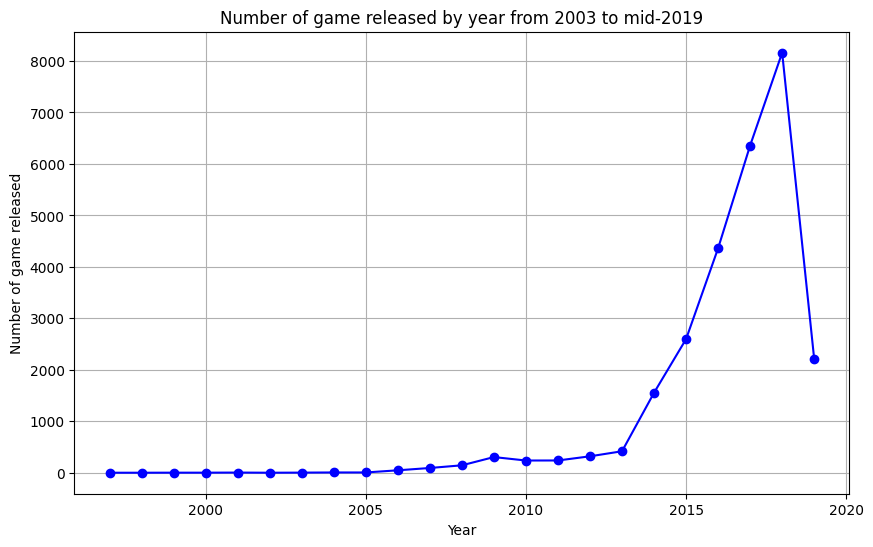

1997       1
1998       1
1999       2
2000       2
2001       4
2002       1
2003       3
2004       6
2005       6
2006      48
2007      93
2008     145
2009     305
2010     238
2011     239
2012     320
2013     418
2014    1555
2015    2597
2016    4361
2017    6357
2018    8160
2019    2213
Name: release_year, dtype: int64

In [ ]:
#Select only the year within the "release_date" column
df['release_year'] = df["release_date"].dt.year

#Group by 'release_year' and count the number of games released each year
games_by_year = df['release_year'].value_counts().sort_index()

#Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(games_by_year.index, games_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of game released by year from 2003 to mid-2019')
plt.xlabel('Year')
plt.ylabel('Number of game released')
plt.grid(True)
plt.show()

games_by_year

In [ ]:
# Calculate the growth rate for each year
games_by_year_growth = games_by_year.pct_change() * 100

# Calculate the average growth rate
average_growth_rate = games_by_year_growth.mean()

In [ ]:
games_by_year_growth

1997           NaN
1998      0.000000
1999    100.000000
2000      0.000000
2001    100.000000
2002    -75.000000
2003    200.000000
2004    100.000000
2005      0.000000
2006    700.000000
2007     93.750000
2008     55.913978
2009    110.344828
2010    -21.967213
2011      0.420168
2012     33.891213
2013     30.625000
2014    272.009569
2015     67.009646
2016     67.924528
2017     45.769319
2018     28.362435
2019    -72.879902
Name: release_year, dtype: float64

In [ ]:
average_growth_rate

83.462435023555

###Amount games get released by each Month

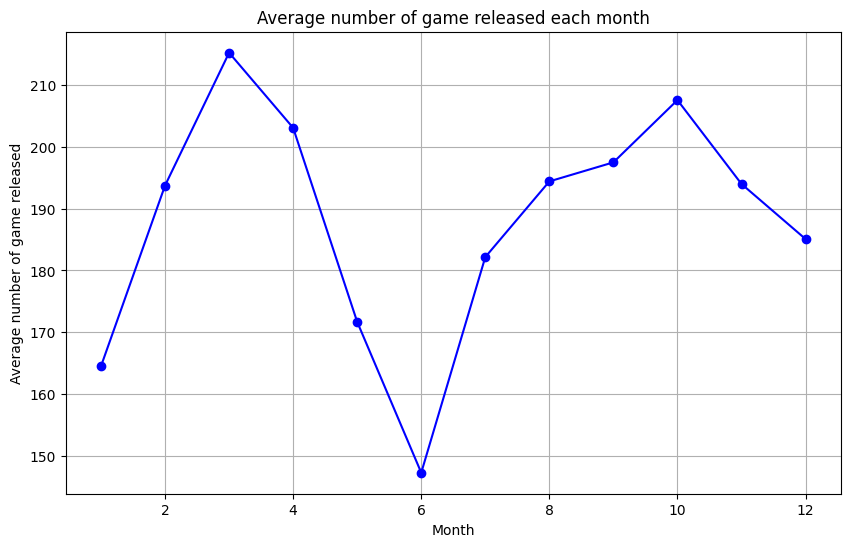

release_month
1     164.500000
2     193.750000
3     215.250000
4     203.083333
5     171.666667
6     147.250000
7     182.166667
8     194.416667
9     197.500000
10    207.583333
11    194.000000
12    185.083333
dtype: float64

In [ ]:
#Select only the month within the "release_date" column
df['release_month'] = df["release_date"].dt.month

#Group by 'release_month' and calculate the total number of games released and the count of months
monthly_counts = df.groupby('release_month').size()
months_count = len(monthly_counts)

#Calculate the average number of games released for each month
avg_games_by_month = monthly_counts / months_count

#Plotting the line char
plt.figure(figsize=(10, 6))
plt.plot(avg_games_by_month.index, avg_games_by_month.values, marker='o', linestyle='-', color='b')
plt.title('Average number of game released each month')
plt.xlabel('Month')
plt.ylabel('Average number of game released')
plt.grid(True)
plt.show()


avg_games_by_month

###Distribution of games by platform

In [ ]:
Platforms_count = df[df["platforms"].str.contains("windows")]['platforms'].value_counts()
Platforms_count

windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
Name: platforms, dtype: int64

In [ ]:
# Calculate the percentage of each platform
platforms_percentage = (Platforms_count / df.shape[0]) * 100

platforms_percentage

windows              67.951985
windows;mac;linux    17.074792
windows;mac          12.701754
windows;linux         2.253001
Name: platforms, dtype: float64

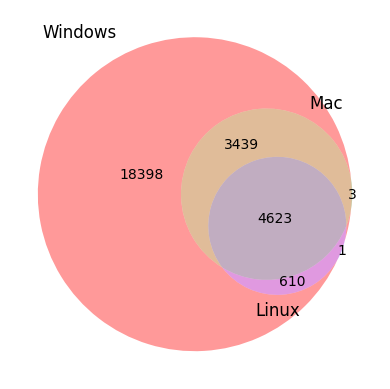

In [ ]:
from matplotlib_venn import venn3

#Calculate the sizes of different intersections and individual sets
windows_size = (df["platforms"] == 'windows').sum()
mac_size = (df["platforms"] == 'mac').sum()
linux_size = (df["platforms"] == 'linux').sum()
windows_mac_size = (df["platforms"] == 'windows;mac').sum()
windows_linux_size = (df["platforms"] == 'windows;linux').sum()
mac_linux_size = (df["platforms"] == 'mac;linux').sum()
windows_mac_linux_size = (df["platforms"] == 'windows;mac;linux').sum()

# Create a Venn diagram
venn3(subsets=(windows_size, mac_size, windows_mac_size, linux_size, windows_linux_size, mac_linux_size, windows_mac_linux_size),
      set_labels=('Windows', 'Mac', 'Linux'))

# Show the plot
plt.show()

###Distribution of all categories after accounted for categories with close similarity to each other

####Pie chart

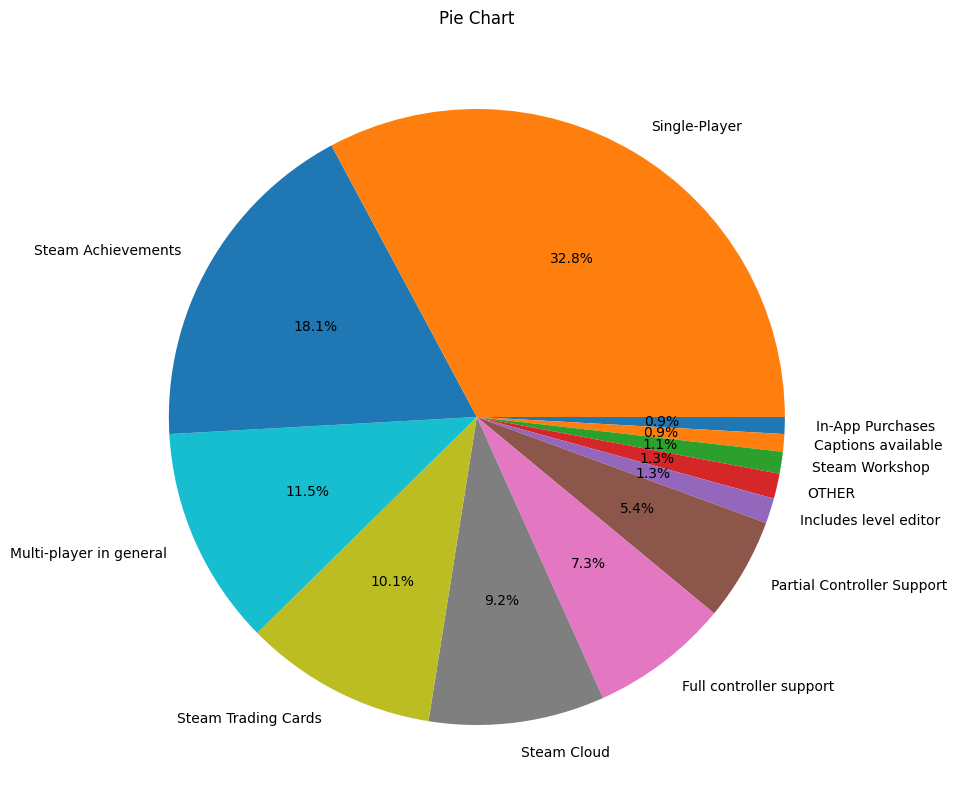

In [ ]:
threshold_cumsum = 99

#Count the occurrences of each category of TOP DEVELOPER
categories_market = [category for category_list in df['categories'].str.split(';') for category in category_list]

#Count all the categories of TOP DEVELOPER
category_counts_market = pd.Series(categories_market).value_counts()

#Get the TOTAL NUMBER of all categories of TOP DEVELOPER
total_categories_combined_market = len(categories_market)

category_counts_market.reset_index()

#get percentage of each categories
category_percentage_market = (category_counts_market / total_categories_combined_market ) * 100

#get cumsum
category_percentage_market_cumsum = category_percentage_market.cumsum()

# Get the categories that are within the thresholds
threshold_categories_market = category_counts_market[category_percentage_market_cumsum < threshold_cumsum]
other_category_market = category_counts_market[category_percentage_market_cumsum > threshold_cumsum]


#Single-player
single_conditions_topDev = df['categories'].str.contains('Single-player', case=False, na=False)

#Multi-player in general
multi_player_general_topDev = df['categories'].str.contains('Multi-player|Shared/Split Screen|Stats|Co-op|Local Multi-Player|Local Co-op|Steam Leaderboards|Online Multi-Player|Stats|Cross-Platform Multiplayer|Online Co-op|MMO', case=False, na=False)

# Calculate the lengths of the conditions
single_topDev = df[single_conditions_topDev].shape[0]
multi_player_general_topDev = df[multi_player_general_topDev].shape[0]

# Define the categories to filter out
filter_categories = ['Steam Leaderboards', 'Online Multi-Player', 'Stats', 'Cross-Platform Multiplayer', 'Online Co-op', 'MMO', 'Shared/Split Screen', 'Co-op', 'Local Multi-Player', 'Local Co-op', 'Single-player', 'Multi-player']

# Filter out the categories from threshold_percentage_categories_cumsum
filtered_threshold_percentage_categories_cumsum_topDev = threshold_categories_market[~threshold_categories_market.index.isin(filter_categories)]

# Create a new DataFrame
market_pie = pd.DataFrame({'count': [single_topDev, multi_player_general_topDev] + list(filtered_threshold_percentage_categories_cumsum_topDev.values)},
                      index=['Single-Player','Multi-player in general'] + list(filtered_threshold_percentage_categories_cumsum_topDev.index))


# Get the categories that are in 'other'
other_categories = other_category_market.index

# Convert categories_topDev to a pandas Series
categories_market_series = pd.Series(categories_market)

# Get the counts of these categories
other_counts = categories_market_series.isin(other_categories).value_counts()

# Sum the counts
other_sum = other_counts[True]

# Add a new row 'OTHER' to df_pie
market_pie.loc['OTHER', 'count'] = other_sum

# Calculate the percentage of each category
market_pie['percentage'] = (market_pie['count'] / market_pie['count'].sum()) * 100

# Sort df_pie by 'percentage' in ascending order
market_pie = market_pie.sort_values('percentage')

# Create the pie chart
plt.figure(figsize=(20, 10))
plt.pie(market_pie['percentage'], labels=market_pie.index, autopct='%2.1f%%', textprops={'fontsize': 10}, counterclock=False)
plt.title('Pie Chart')
plt.show()

In [ ]:
category_counts_market

Single-player                 25678
Steam Achievements            14130
Steam Trading Cards            7918
Steam Cloud                    7219
Full controller support        5695
Partial Controller Support     4234
Multi-player                   3974
Steam Leaderboards             3439
Online Multi-Player            2487
Shared/Split Screen            2152
Stats                          1878
Co-op                          1721
Local Multi-Player             1615
Cross-Platform Multiplayer     1081
Online Co-op                   1071
Local Co-op                    1059
Includes level editor          1036
Steam Workshop                  897
Captions available              721
In-App Purchases                690
MMO                             421
VR Support                      231
Commentary available            144
Valve Anti-Cheat enabled         94
Steam Turn Notifications         63
SteamVR Collectibles             40
Includes Source SDK              35
Mods                        

In [ ]:
market_pie

,count,percentage
In-App Purchases,690.0,0.881969
Captions available,721.0,0.921594
Steam Workshop,897.0,1.146560
OTHER,1031.0,1.317841
Includes level editor,1036.0,1.324232
Partial Controller Support,4234.0,5.411969
Full controller support,5695.0,7.279444
Steam Cloud,7219.0,9.227446
Steam Trading Cards,7918.0,10.120919
Multi-player in general,8985.0,11.484776


####Venn Chart

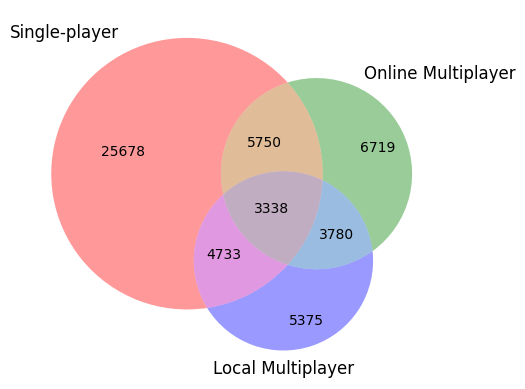

In [ ]:
#Overlapping of Single-player & Multi-player game - Local Multiplayer & Online Multiplayer
from matplotlib_venn import venn3

# Conditions
online_conditions_market = df['categories'].str.contains('Steam Leaderboards|Online Multi-Player|Stats|Cross-Platform Multiplayer|Online Co-op|MMO', case=False, na=False)
local_conditions_market = df['categories'].str.contains('Shared/Split Screen|Stats|Co-op|Local Multi-Player|Local Co-op', case=False, na=False)
single_conditions_market = df['categories'].str.contains('Single-player', case=False, na=False)

# Calculate the sizes of the regions
single_market =  df[single_conditions_market].shape[0]
online_market = df[online_conditions_market].shape[0]
local_market = df[local_conditions_market].shape[0]

# Calculate the intersections
single_online = (single_conditions_market & online_conditions_market).sum()
single_local = (single_conditions_market & local_conditions_market).sum()
online_local = (online_conditions_market & local_conditions_market).sum()
single_online_local = (single_conditions_market & online_conditions_market & local_conditions_market).sum()

# Create the Venn diagram
venn3(subsets=(single_market, online_market, single_online, local_market, single_local, online_local, single_online_local),
      set_labels=('Single-player', 'Online Multiplayer', 'Local Multiplayer'))

plt.show()

From the Venn diagram, we can conclude that MULTIPLAYER game can either has Single, Online, Local Multiplayer OR only has Local & Online Multiplayer

###ANALYZE the distribution of GENRES

####Pie chart genres distribution

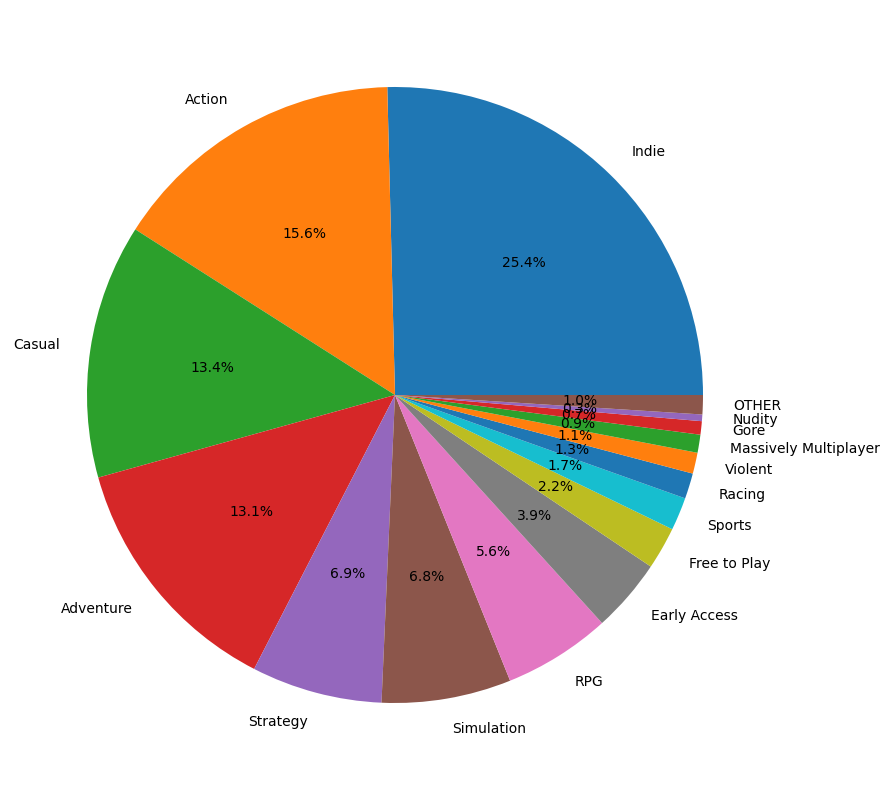

76462

In [ ]:
other_genres_index = other_genres.index

#Create a new DataFrame for combined counts
genres_counts_combined = genres_counts.copy()

#Assign the sum of genres that are in other_genres_index into a new "Other" category
genres_counts_combined.loc["OTHER"] = genres_counts_combined.loc[other_genres_index].sum()

#Drop genres that are now part of "OTHER" category
genres_counts_combined = genres_counts_combined.drop(other_genres_index)

# Set the figure size
plt.figure(figsize=(15, 10))

#Create a pie chart with automatic labels
plt.pie(genres_counts_combined, labels=genres_counts_combined.index, autopct='%0.1f%%')

#Display the pie chart
plt.show()

genres_counts_combined.sum()

####Stacked Bar Chart genres trend over the year

In [ ]:
#Specifying the color for the bar chart
custom_colors = sns.color_palette('husl', 15)

Text(0.5, 0, 'release_year')

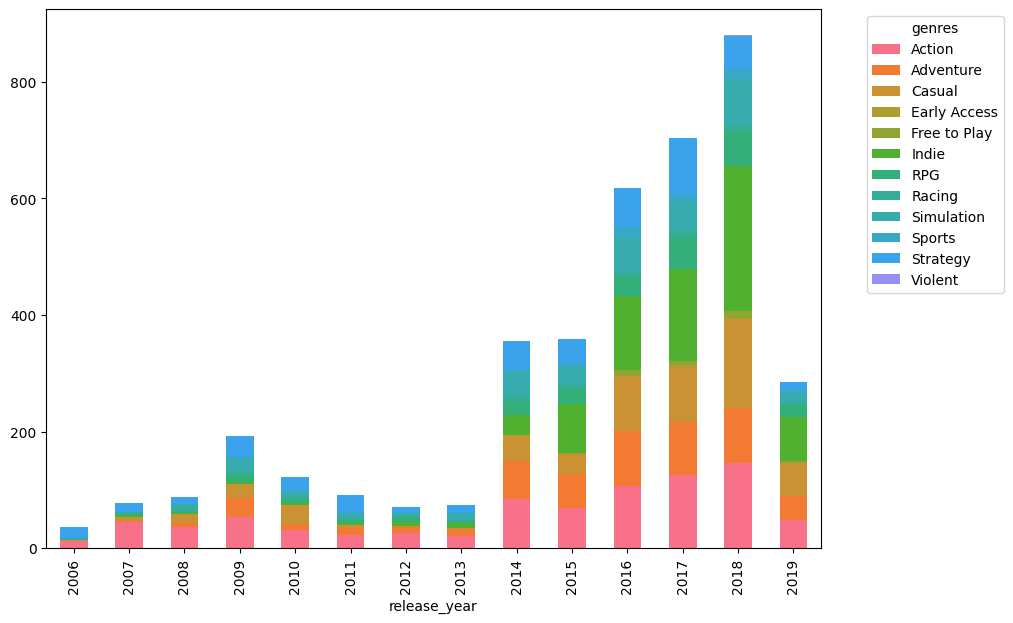

In [ ]:
#Calculate the total count of all genres
count_genres = genres_counts.sum()

#Filter out genres above the threshold
filtered_genres = genres_counts[genres_counts / count_genres * 100 >= threshold].index

#Filter the DataFrame to include only the desired genres
df_filtered = df[df['genres'].isin(filtered_genres)]

# Add a filter for the release year
df_filtered = df_filtered[df_filtered['release_year'] >= 2006]

#Group by release_date and genres to get counts
genres_counts_over_time = df_filtered.groupby(['release_year', 'genres']).size().unstack()

genres_counts_over_time.plot.bar(stacked=True, color=custom_colors, figsize=(10, 7))

plt.legend(title='genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("release_year")

Text(0.5, 1.0, 'Normalized Genres Distribution Over Time')

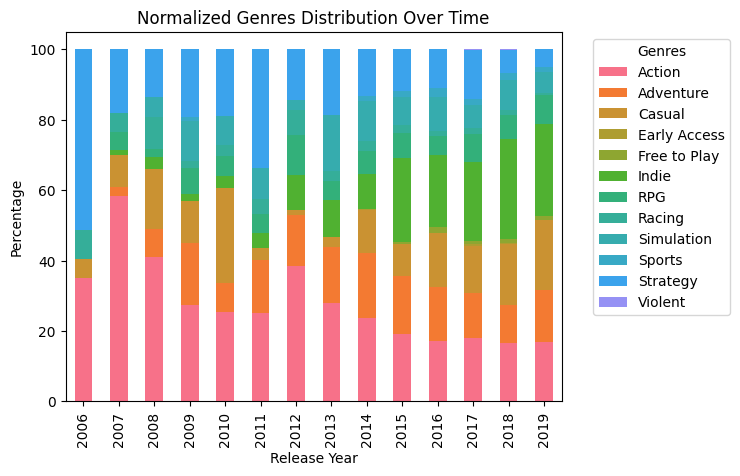

In [ ]:
# Calculate the total count of genres for each release year
total_counts_per_year = genres_counts_over_time.sum(axis=1)

#Normalize the data then convert to percentage
genres_percentage_over_time = genres_counts_over_time.divide(total_counts_per_year, axis=0) * 100

# Plot the bar chart
genres_percentage_over_time.plot.bar(stacked=True, color=custom_colors)

plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Release Year")
plt.ylabel("Percentage")
plt.title("Normalized Genres Distribution Over Time")

###Line chart to analyze price trend over years

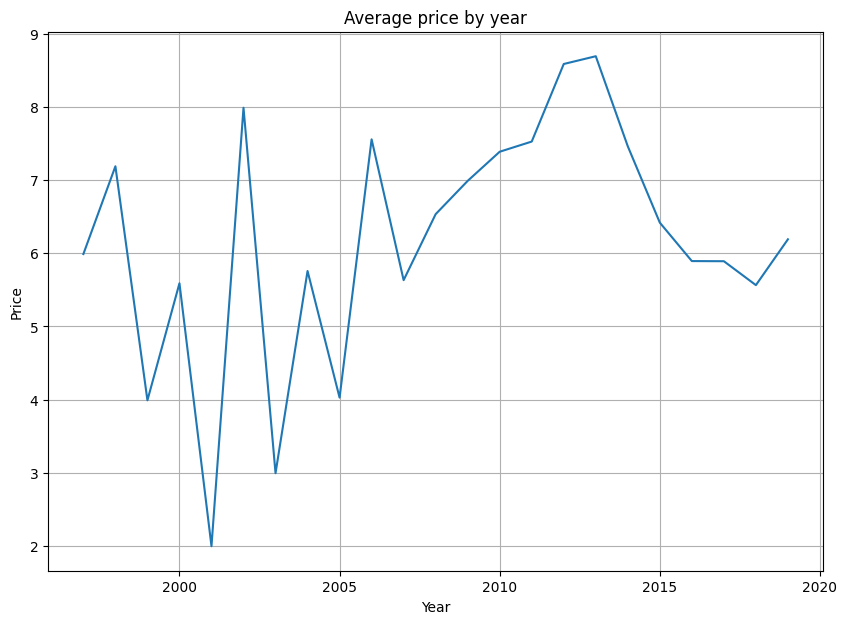

In [ ]:
# get the AVERAGE PRICE by year
average_price_by_year = df.groupby('release_year')['price'].mean()

average_price_by_year.plot(figsize=(10, 7))
plt.title('Average price by year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
average_price_by_year

release_year
1997    5.990000
1998    7.190000
1999    3.990000
2000    5.590000
2001    1.995000
2002    7.990000
2003    2.993333
2004    5.758333
2005    4.026667
2006    7.558542
2007    5.633011
2008    6.535241
2009    6.990393
2010    7.388866
2011    7.527824
2012    8.588563
2013    8.694737
2014    7.462797
2015    6.419072
2016    5.893765
2017    5.891822
2018    5.565001
2019    6.191536
Name: price, dtype: float64

In [ ]:
average_price = df['price'].mean()
average_price_by_year

release_year
1997    5.990000
1998    7.190000
1999    3.990000
2000    5.590000
2001    1.995000
2002    7.990000
2003    2.993333
2004    5.758333
2005    4.026667
2006    7.558542
2007    5.633011
2008    6.535241
2009    6.990393
2010    7.388866
2011    7.527824
2012    8.588563
2013    8.694737
2014    7.462797
2015    6.419072
2016    5.893765
2017    5.891822
2018    5.565001
2019    6.191536
Name: price, dtype: float64

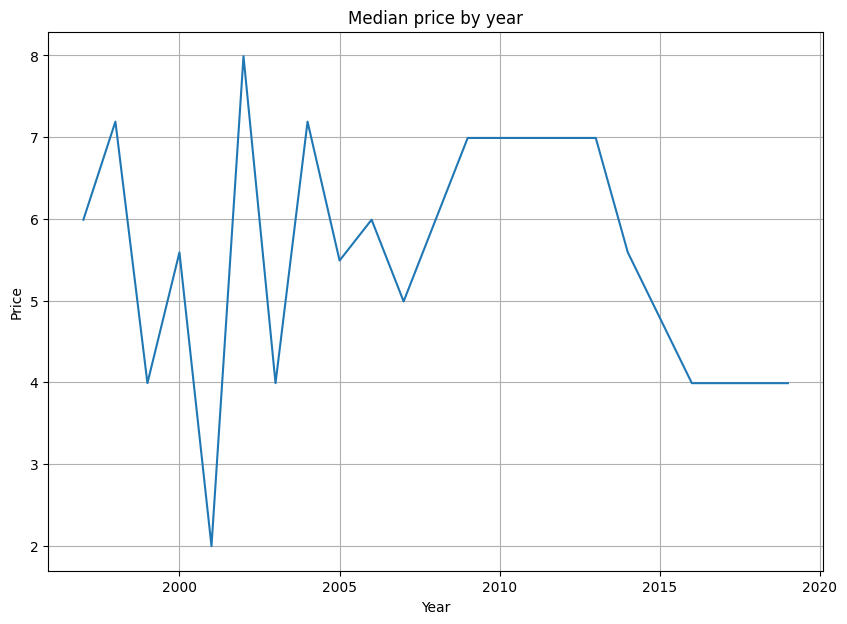

In [ ]:
# Get the MEDIAN PRICE by year
median_price_by_year = df.groupby('release_year')['price'].median()

median_price_by_year.plot(figsize=(10, 7))
plt.title('Median price by year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

###Positive rating trend

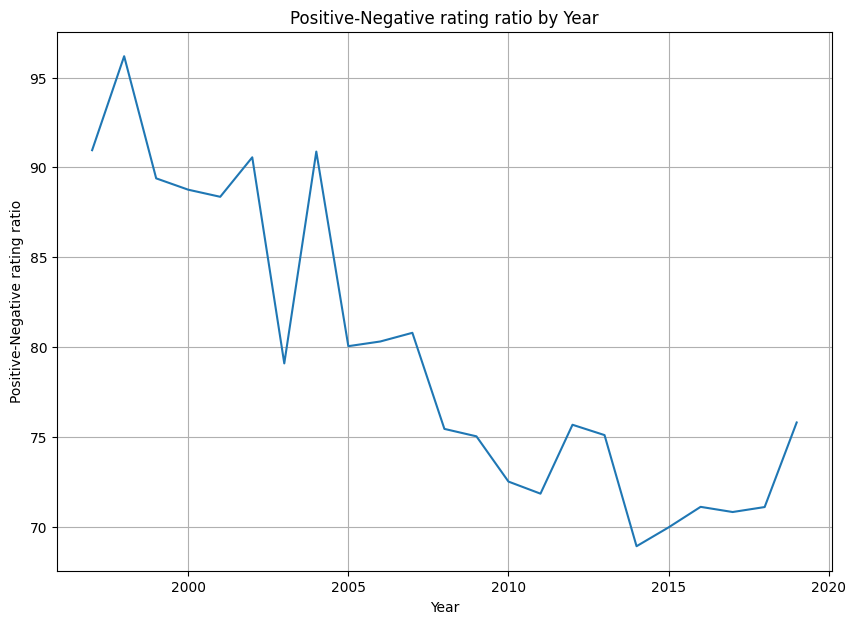

In [ ]:
df["positive_negative_ratio"] = df["positive_ratings"] / ( df["negative_ratings"] + df["positive_ratings"] ) * 100

positive_ratio_yearly = df.groupby('release_year')['positive_negative_ratio'].mean()

positive_ratio_yearly.plot(figsize=(10,7))
plt.title('Positive-Negative rating ratio by Year')
plt.xlabel('Year')
plt.ylabel('Positive-Negative rating ratio')
plt.grid(True)
plt.show()

##ANALYZE THE DATA ABOUT THE TOP DEVELOPER

#####Find top 3 developer in term of 'Positive rating' by year & compared them with the rest

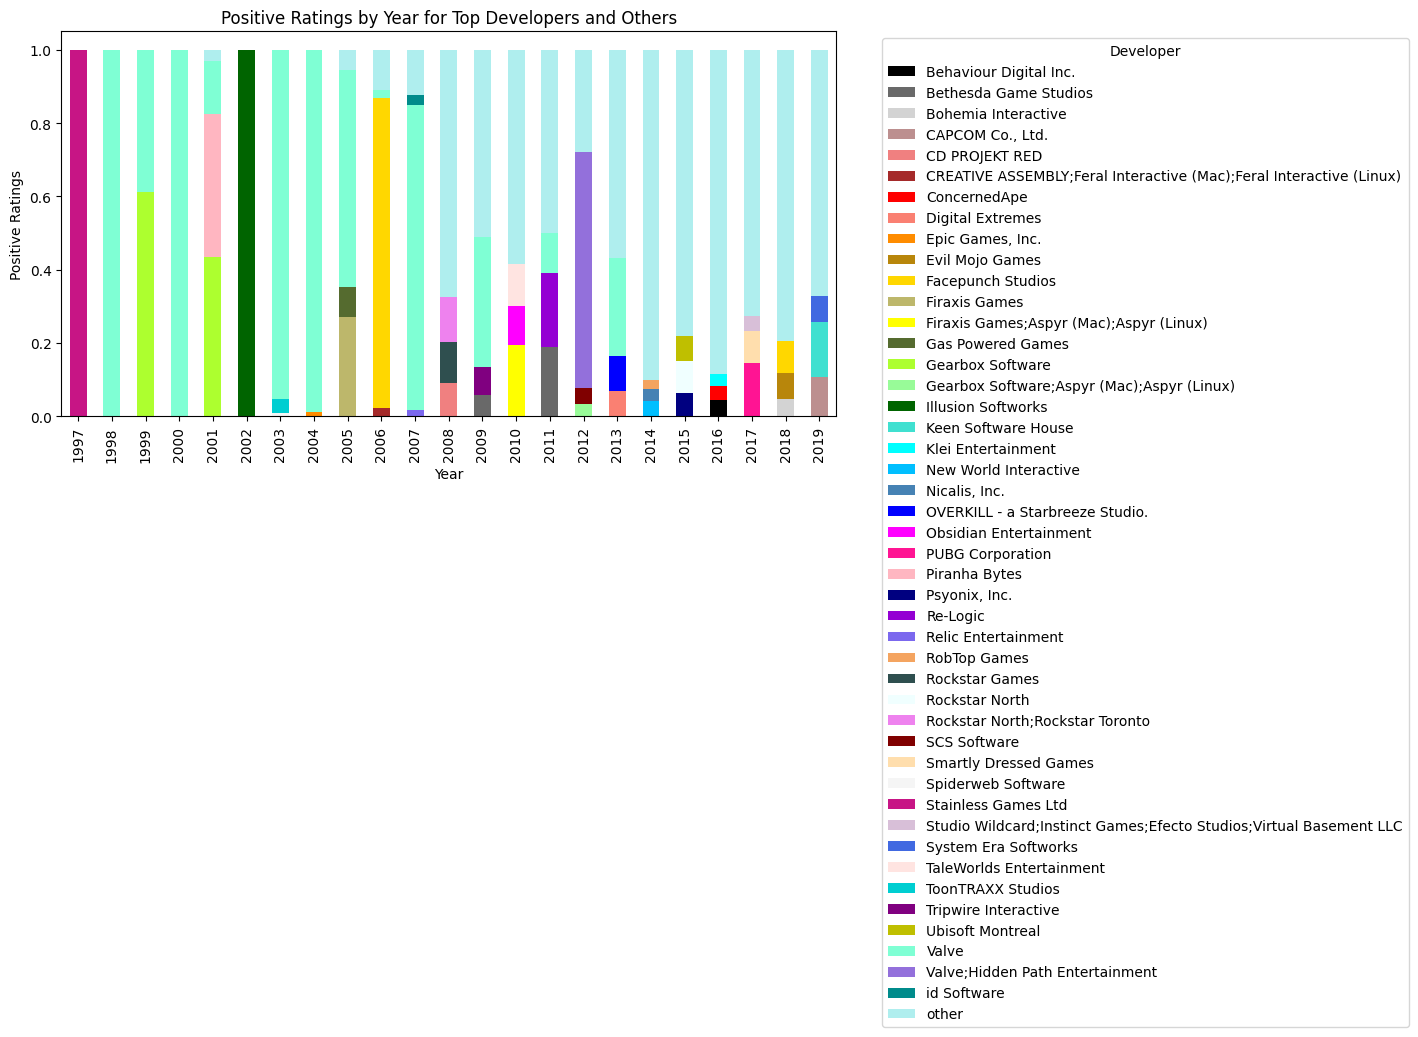

In [ ]:
#Group by 'year' and 'developer', calculate sum of 'positive_ratings'
grouped = df.groupby(['release_year', 'developer'])['positive_ratings'].sum().reset_index()

#For each year, select top 3 developers based on 'positive_ratings'
top_developers = grouped.groupby('release_year').apply(lambda x: x.nlargest(3, 'positive_ratings')).reset_index(drop=True)

#Create a list of top developers with year
top_developers_list = top_developers[['release_year', 'developer']].values.tolist()

#If developer-year pair is not in top developers list, replace it with 'other'
grouped['developer'] = grouped.apply(lambda row: row['developer'] if [row['release_year'], row['developer']] in top_developers_list else 'other', axis=1)

#calculate the sum of positive rating by 'year' & 'developer' of grouped & then reshape the dataframe from Long > Wide format with 'year' as index
grouped_data = grouped.groupby(['release_year', 'developer'])['positive_ratings'].sum().unstack()

# Normalize the data to create a 100% stacked bar chart
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Manually create a list of colors
colorss=[
    'black','dimgray','lightgray','rosybrown','lightcoral','brown','red','salmon','darkorange',
    'darkgoldenrod','gold','darkkhaki','yellow','darkolivegreen','greenyellow','palegreen',
    'darkgreen','turquoise','cyan','deepskyblue','steelblue','blue','magenta','deeppink',
    'lightpink','navy','darkviolet','mediumslateblue','sandybrown','darkslategray','azure',
    'violet','maroon','navajowhite','whitesmoke','mediumvioletred','thistle','royalblue',
    'mistyrose','darkturquoise','purple','y','aquamarine','mediumpurple','darkcyan','paleturquoise',
]

grouped_data.plot(kind='bar', stacked=True, color=colorss, figsize=(10,5))
plt.title('Positive Ratings by Year for Top Developers and Others')
plt.xlabel('Year')
plt.ylabel('Positive Ratings')
plt.legend(title='Developer', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.show()

#####Find top 3 developer in term of 'Owner' by year using Owner_Mean

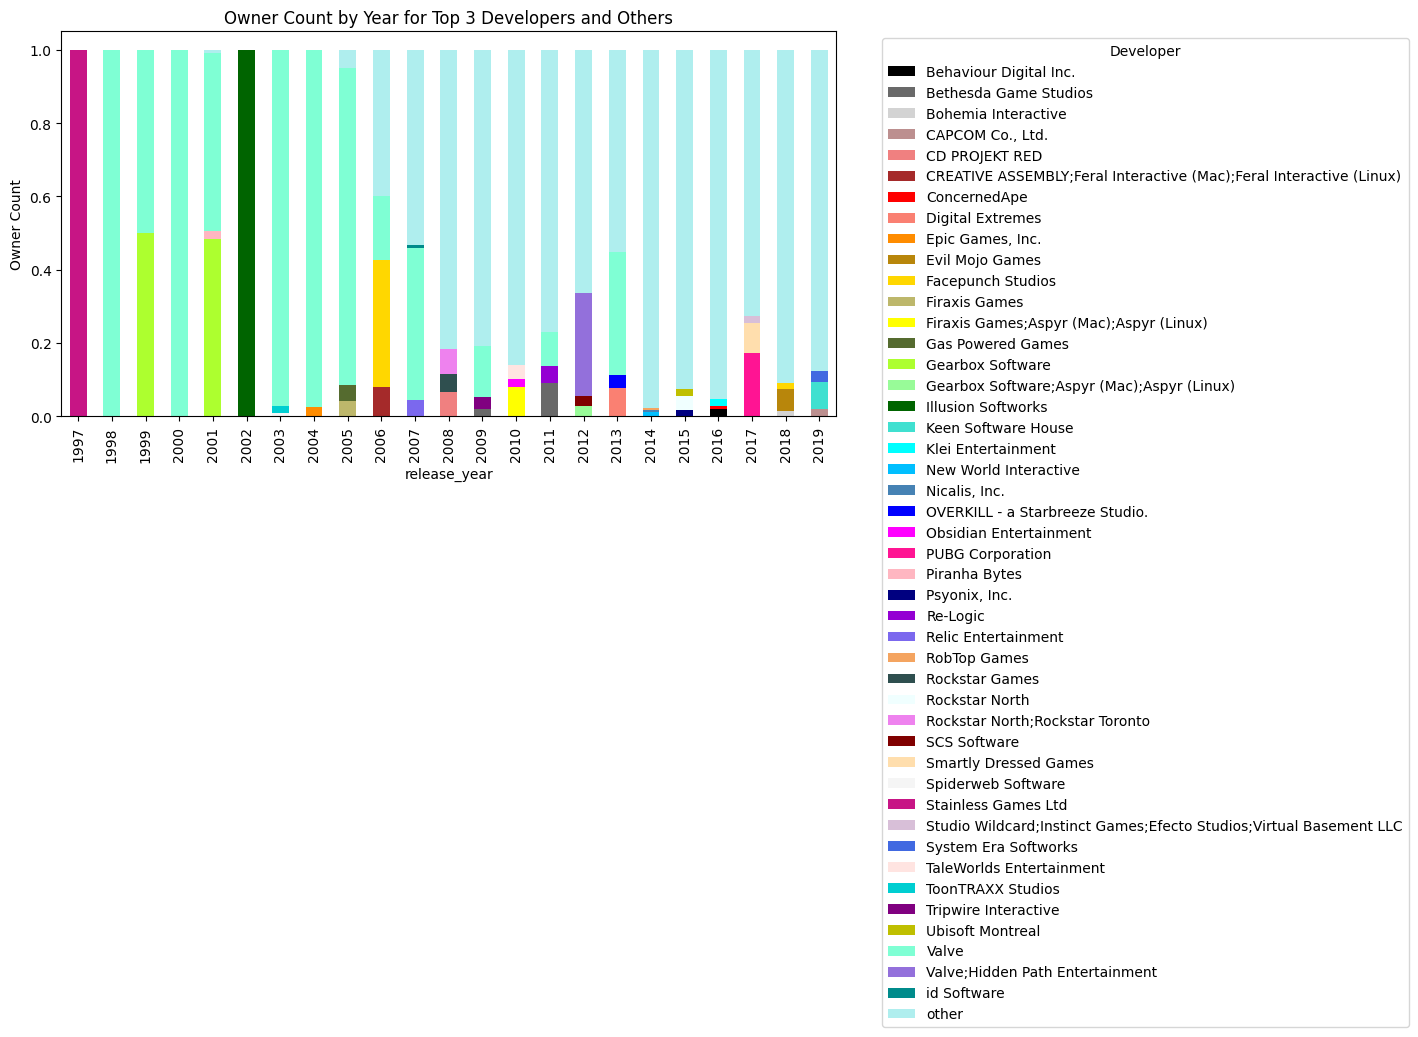

In [ ]:
# Group by 'year' and 'developer', calculate sum of 'Owner_encode'
grouped_owner = df.groupby(['release_year', 'developer'])['Owner_Mean'].mean().reset_index()

# For each year, select top 3 developers based on 'Owner_encode'
top_developers_owner = grouped_owner.groupby('release_year').apply(lambda x: x.nlargest(3, 'Owner_Mean')).reset_index(drop=True)

# Create a list of top developers with year
top_developers_list_owner = top_developers_owner[['release_year', 'developer']].values.tolist()

# If developer-year pair is not in top developers list, replace it with 'other'
grouped_owner['developer'] = grouped_owner.apply(lambda row: row['developer'] if [row['release_year'], row['developer']] in top_developers_list else 'other', axis=1)

grouped_data_Owner = grouped_owner.groupby(['release_year', 'developer'])['Owner_Mean'].sum().unstack()

# Normalize the data to create a 100% stacked bar chart
grouped_data_Owner = grouped_data_Owner.div(grouped_data_Owner.sum(axis=1), axis=0)

# Manually create a list of colors
colorss=[
    'black','dimgray','lightgray','rosybrown','lightcoral','brown','red','salmon','darkorange',
    'darkgoldenrod','gold','darkkhaki','yellow','darkolivegreen','greenyellow','palegreen',
    'darkgreen','turquoise','cyan','deepskyblue','steelblue','blue','magenta','deeppink',
    'lightpink','navy','darkviolet','mediumslateblue','sandybrown','darkslategray','azure',
    'violet','maroon','navajowhite','whitesmoke','mediumvioletred','thistle','royalblue',
    'mistyrose','darkturquoise','purple','y','aquamarine','mediumpurple','darkcyan','paleturquoise',
]


grouped_data_Owner.plot(kind='bar', stacked=True, color=colorss, figsize=(10,5))
plt.title('Owner Count by Year for Top 3 Developers and Others')
plt.xlabel('release_year')
plt.ylabel('Owner Count')
plt.legend(title='Developer', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.show()


######Find the difference between "Top 3 developer in positive rating yearly" & "top 3 developer in owner count yearly"

In [ ]:
#Convert the columns to sets
grouped_data_columns = set(grouped_data.columns)
grouped_data_Owner_columns = set(grouped_data_Owner.columns)

#Find the difference
difference = grouped_data_columns.difference(grouped_data_Owner_columns)

difference

set()

In [ ]:
#There is no difference between the 2 chart

####Price trend of TOP DEVELOPER

#####Get the trend of price of top 3 Developers yearly

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31070 (\N{CJK UNIFIED IDEOGRAPH-795E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32118 (\N{CJK UNIFIED IDEOGRAPH-7D76}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26223 (\N{CJK UNIFIED IDEOGRAPH-666F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29256 (\N{CJK UNIFIED IDEOGRAPH-7248}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

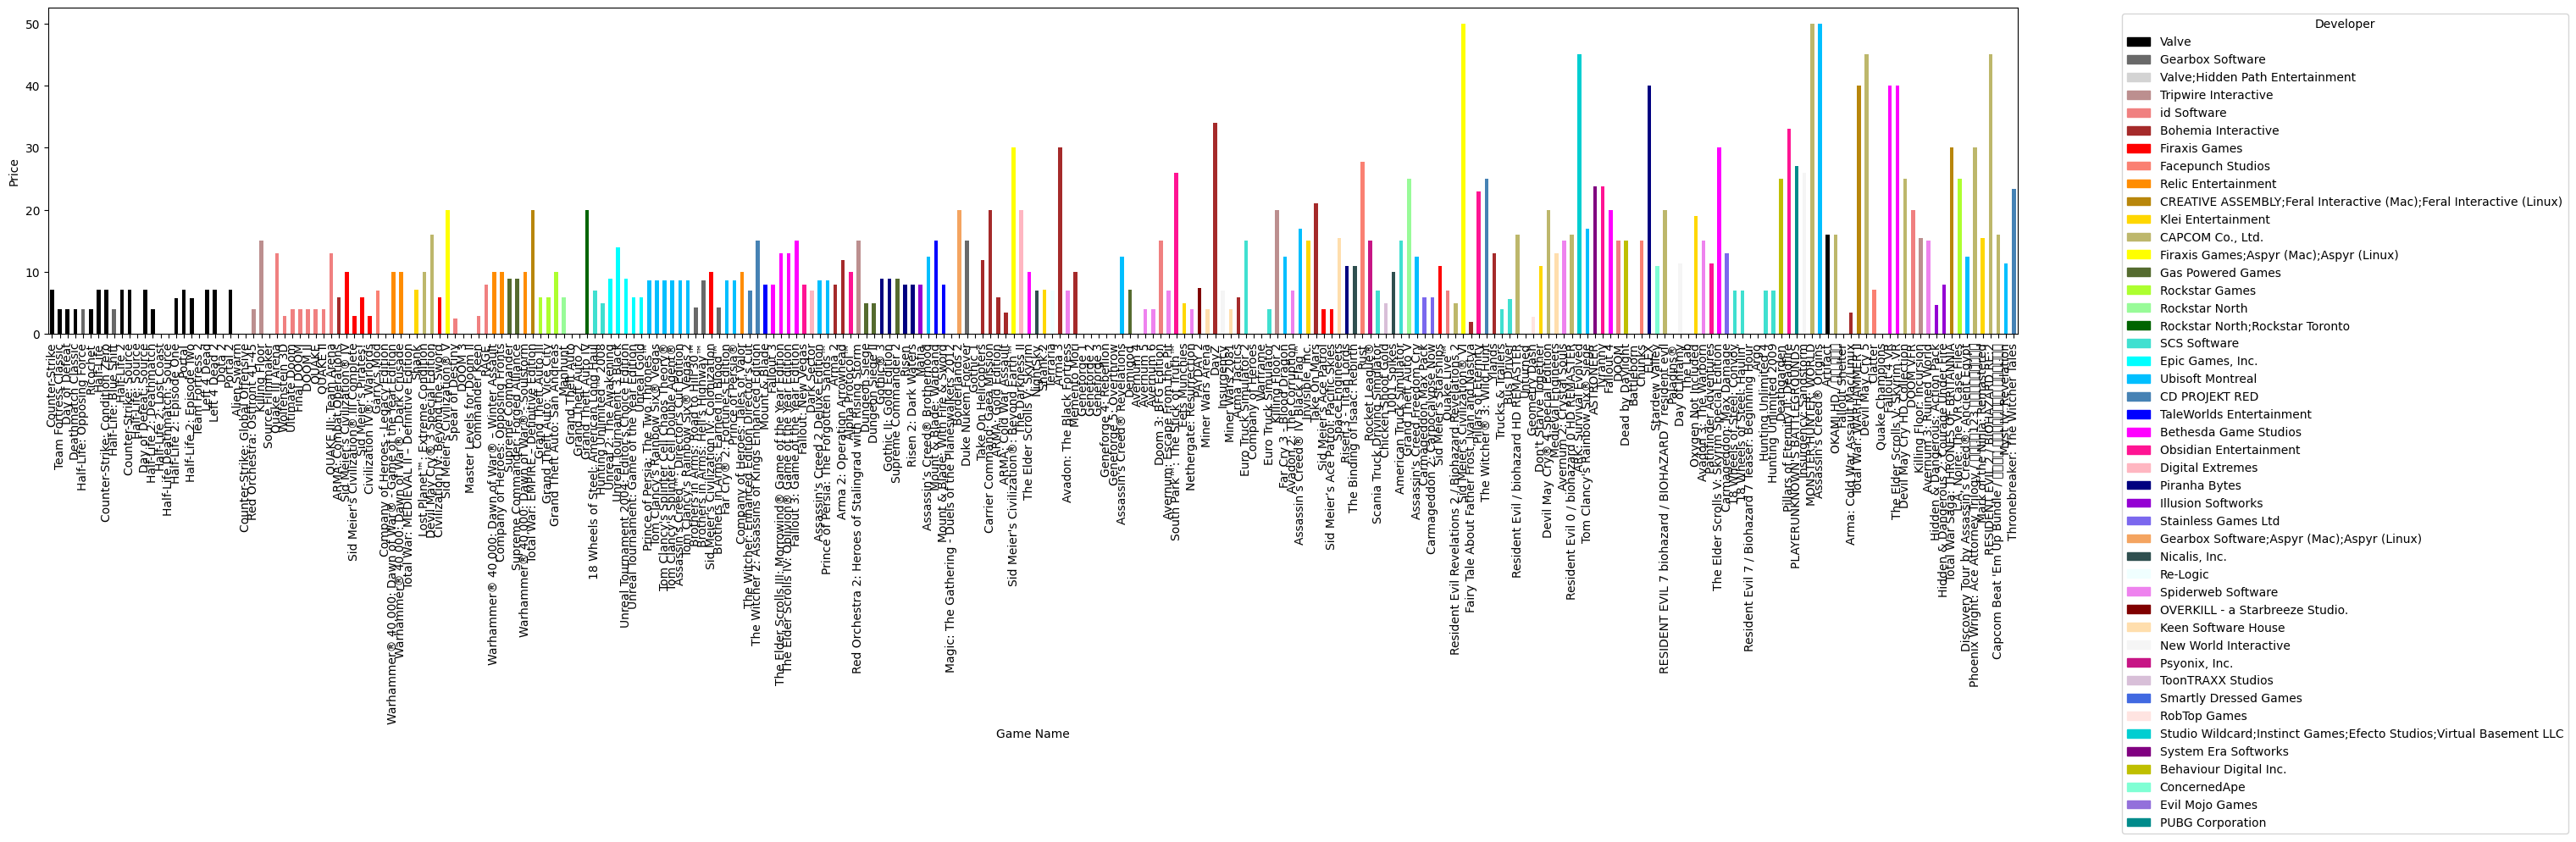

In [ ]:
#Create a new dataframe based on 'df' BUT ONLY INCLUDE EVERYTHING ASSOCIATED with the top developers
include_top_dev = df[df['developer'].isin(top_developers['developer'])]

#Create a color dictionary
unique_developers = include_top_dev['developer'].unique()
colors = {developer: color for developer, color in zip(unique_developers, colorss)}

#Create a bar chart
bar = include_top_dev.plot(kind='bar', x='name', y='price', color=include_top_dev['developer'].map(colors), figsize=(30,5))

#Set x-axis label
bar.set_xlabel("Game Name")

#Change the font size of the x-axis labels
bar.tick_params(axis='x')

#Set y-axis label
bar.set_ylabel("Price")

#Create legend
patches = [mpatches.Patch(color=color, label=developer) for developer, color in colors.items()]
bar.legend(handles=patches,title='Developer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
#Average price
include_top_dev['price'].mean()

11.033425196850395

#####Price category of game made by top 3 developer

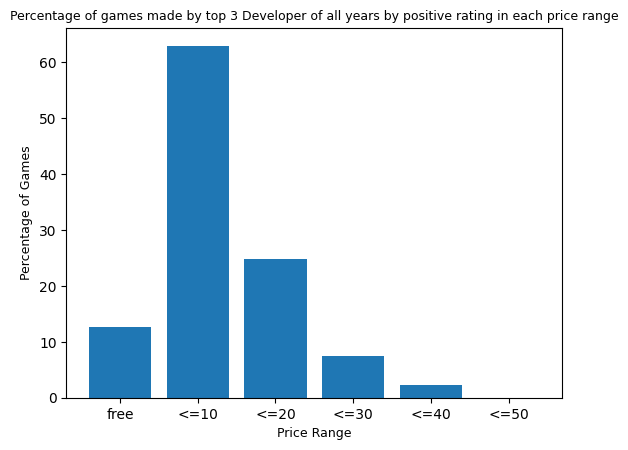

In [ ]:
#Getting the percentage of free game made by the top 3 developer yearly in term of "positive_rating"
free_games = include_top_dev[include_top_dev['prize_category'] == 0]

#Getting the TOTAL AMOUNT OF FREE GAME made by the top 3 developer yearly in term of "positive_rating"
free_game_TopDev_counts = len(free_games)

#Getting the TOTAL AMOUNT OF GAME made by the top 3 developer yearly in term of "positive_rating"
total_games_topDev = len(include_top_dev)

#Calculate the percentage of free games
free_game_percentage = (free_game_TopDev_counts / total_games_topDev) * 100

#Create each categorical price percentage
game_TopDev_10 = include_top_dev[include_top_dev['price'] <= 10]['price'].count()

game_TopDev_20 = include_top_dev[(include_top_dev['price'] > 10) & (include_top_dev['price'] <= 20)]['price'].count()

game_TopDev_30 = include_top_dev[(include_top_dev['price'] > 20) & (include_top_dev['price'] <= 30)]['price'].count()

game_TopDev_40 = include_top_dev[(include_top_dev['price'] > 30) & (include_top_dev['price'] <= 40)]['price'].count()

game_TopDev_50 = include_top_dev[(include_top_dev['price'] >= 50) & (include_top_dev['price'] <= 50)]['price'].count()

#Calculate the percentages
free = ( free_game_TopDev_counts / total_games_topDev ) * 100
percent_game_10_topDev = (game_TopDev_10 / total_games_topDev) * 100
percent_game_20_topDev = (game_TopDev_20 / total_games_topDev) * 100
percent_game_30_topDev = (game_TopDev_30 / total_games_topDev) * 100
percent_game_40_topDev = (game_TopDev_40 / total_games_topDev) * 100
percent_game_50_topDev = (game_TopDev_50 / total_games_topDev) * 100

#Create a list of the percentages
percentages = [free, percent_game_10_topDev, percent_game_20_topDev, percent_game_30_topDev, percent_game_40_topDev, percent_game_50_topDev]

#Create a list of the price ranges
price_ranges = ['free','<=10', '<=20', '<=30', '<=40','<=50']

#Create the bar chart
plt.bar(price_ranges, percentages)

#Add a title and labels
plt.title('Percentage of games made by top 3 Developer of all years by positive rating in each price range', fontsize=9)
plt.xlabel('Price Range', fontsize=9)
plt.ylabel('Percentage of Games', fontsize=9)

#Display the chart
plt.show()

####Price category by percentage of the entire market

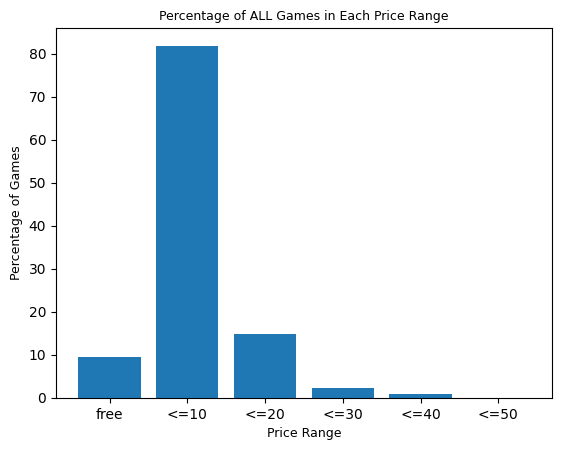

In [ ]:
#Sort out free game of the dataset
free_games_market = df[df['prize_category'] == 0]

#Find the total number of free game of the dataset
free_game_counts_market = len(free_games_market)

#Find the total amount of games
total_games = len(df)

#Create each categorical price percentage
game_market_10 = df[df['price'] <= 10]['price'].count()

game_market_20 = df[(df['price'] > 10) & (df['price'] <= 20)]['price'].count()

game_market_30 = df[(df['price'] > 20) & (df['price'] <= 30)]['price'].count()

game_market_40 = df[(df['price'] > 30) & (df['price'] <= 40)]['price'].count()

game_market_50 = df[(df['price'] >= 50) & (df['price'] <= 50)]['price'].count()

# Calculate the percentages
free = ( free_game_counts_market / total_games ) * 100
percent_cost10 = (game_market_10 / total_games) * 100
percent_cost20 = (game_market_20 / total_games) * 100
percen_cost30 = (game_market_30 / total_games) * 100
percent_cost40 = (game_market_40 / total_games) * 100
percent_cost50 = (game_market_50 / total_games) * 100

# Create a list of the percentages
percentages = [free, percent_cost10, percent_cost20, percen_cost30, percent_cost40, percent_cost50]

# Create a list of the price ranges
price_ranges = ['free','<=10', '<=20', '<=30', '<=40','<=50']

# Create the bar chart
plt.bar(price_ranges, percentages)

# Add a title and labels
plt.title('Percentage of ALL Games in Each Price Range',fontsize=9)
plt.xlabel('Price Range', fontsize=9)
plt.ylabel('Percentage of Games', fontsize=9)

# Display the chart
plt.show()

####Pie chart Genre distribution of top developer

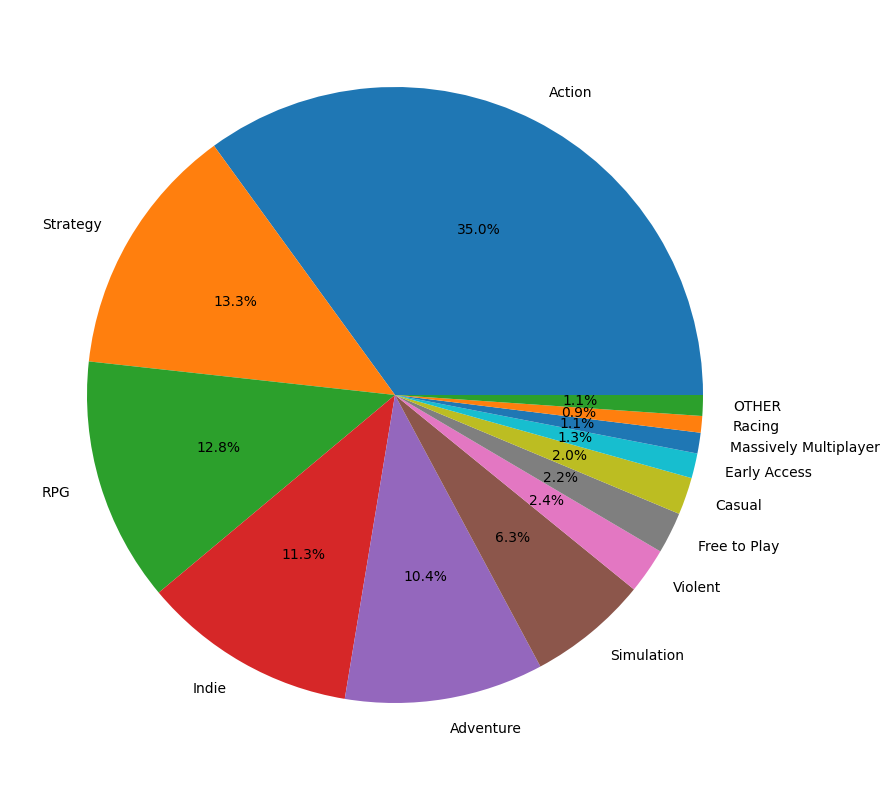

In [ ]:
#Create a threshold to filter out game that are within the 1% ( >99% of cumsum )
threshold_cumsum = 99

#Extract the genres of the game made by topDev
genres_topDev = [genres for genres_list in include_top_dev['genres'].str.split(';') for genres in genres_list]

#Convert to series for count
genres_series_topDev = pd.Series(genres_topDev)

#Count the number for each genres
genres_counts_topDev = genres_series_topDev.value_counts()

#Count the total number of all genres combined
total_genres_topDev_combined = len(genres_topDev)

#Get the percentage
genres_percentage_topDev = (genres_counts_topDev / total_genres_topDev_combined ) * 100

#Get the cumsum percentage
genres_percentage_topDev_cumsum = genres_percentage_topDev.cumsum()

#Create a new variable that only has the genres that are within the 99%
genres_counts_topDev_combined = genres_percentage_topDev_cumsum[genres_percentage_topDev_cumsum < threshold_cumsum]

#Get a new variable that has the genres are within the 1%
other_genres_TopDev = genres_percentage_topDev_cumsum[genres_percentage_topDev_cumsum > threshold_cumsum]

other_genres_TopDev_index = other_genres_TopDev.index

#copy genres from "genres_counts_topDev" to get ALL THE GENRES
genres_counts_topDev_combined = genres_counts_topDev.copy()

#Count the total number of genres that are matched with "other_genres_TopDev_index"
genres_counts_topDev_combined.loc["OTHER"] = genres_counts_topDev_combined.loc[other_genres_TopDev_index].sum()

#Drop genres that are now part of "OTHER" category
genres_counts_topDev_combined = genres_counts_topDev_combined.drop(other_genres_TopDev_index)

# Set the figure size
plt.figure(figsize=(15, 10))

#Create a pie chart with automatic labels
plt.pie(genres_counts_topDev_combined, labels=genres_counts_topDev_combined.index, autopct='%1.1f%%')

#Display the pie chart
plt.show()

In [ ]:
other_genres_TopDev

Video Production         99.130435
Animation & Modeling     99.347826
Nudity                   99.565217
Sports                   99.782609
Gore                    100.000000
dtype: float64

####Pie chart Categorical distribution of top developer

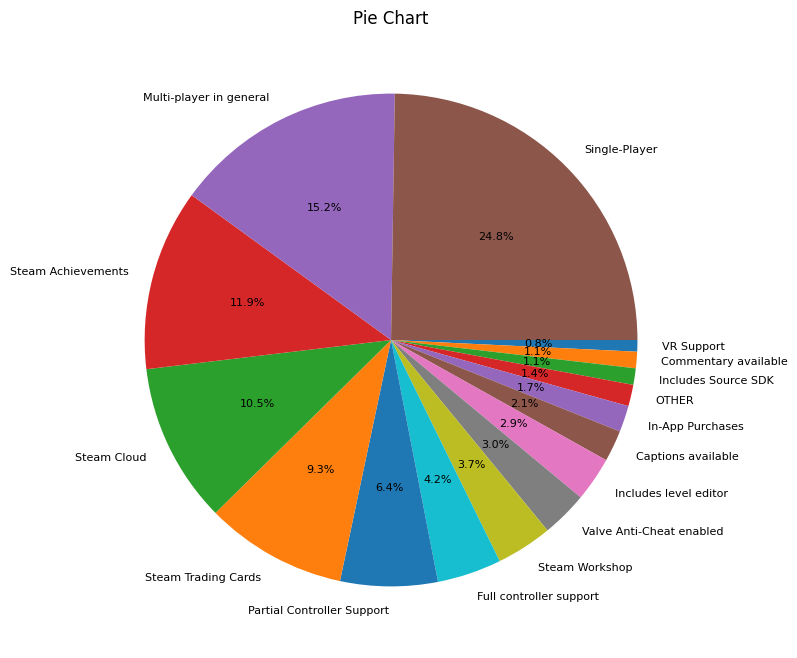

In [ ]:
threshold_cumsum = 99

#Count the occurrences of each category of TOP DEVELOPER
categories_topDev = [category for category_list in include_top_dev['categories'].str.split(';') for category in category_list]

#Count all the categories of TOP DEVELOPER
category_counts_topDev = pd.Series(categories_topDev).value_counts()

#Get the TOTAL NUMBER of all categories of TOP DEVELOPER
total_categories_combined_topDev = len(categories_topDev)

category_counts_topDev.reset_index()

#get percentage of each categories
category_percentage_topDev = (category_counts_topDev / total_categories_combined_topDev ) * 100

#get cumsum
category_percentage_topDev_cumsum = category_percentage_topDev.cumsum()


#Get the categories that are within the threshold of cumsum
threshold_category_topDev = category_counts_topDev[category_percentage_topDev_cumsum < threshold_cumsum]
other_category_topDev = category_counts_topDev[category_percentage_topDev_cumsum > threshold_cumsum]


#Single-player
single_conditions_topDev = include_top_dev['categories'].str.contains('Single-player', case=False, na=False)

#Multi-player in general
multi_player_general_topDev = include_top_dev['categories'].str.contains('Multi-player|Shared/Split Screen|Stats|Co-op|Local Multi-Player|Local Co-op|Steam Leaderboards|Online Multi-Player|Stats|Cross-Platform Multiplayer|Online Co-op|MMO', case=False, na=False)

# Calculate the lengths of the conditions
single_topDev = include_top_dev[single_conditions_topDev].shape[0]
multi_player_general_topDev = include_top_dev[multi_player_general_topDev].shape[0]

# Define the categories to filter out
filter_categories = ['Steam Leaderboards', 'Online Multi-Player', 'Stats', 'Cross-Platform Multiplayer', 'Online Co-op', 'MMO', 'Shared/Split Screen', 'Co-op', 'Local Multi-Player', 'Local Co-op', 'Single-player', 'Multi-player']

# Filter out the categories from threshold_percentage_categories_cumsum
filtered_threshold_percentage_categories_cumsum_topDev = threshold_category_topDev[~threshold_category_topDev.index.isin(filter_categories)]

# Create a new DataFrame
topDev_pie = pd.DataFrame({'count': [single_topDev, multi_player_general_topDev] + list(filtered_threshold_percentage_categories_cumsum_topDev.values)},
                      index=['Single-Player','Multi-player in general'] + list(filtered_threshold_percentage_categories_cumsum_topDev.index))


# Get the categories that are in 'other'
other_categories = other_category_topDev.index

# Convert categories_topDev to a pandas Series
categories_topDev_series = pd.Series(categories_topDev)

# Get the counts of these categories
other_counts = categories_topDev_series.isin(other_categories).value_counts()

# Sum the counts
other_sum = other_counts[True]

# Add a new row 'OTHER' to df_pie
topDev_pie.loc['OTHER', 'count'] = other_sum

# Recalculate the percentages
topDev_pie['percentage'] = (topDev_pie['count'] / topDev_pie['count'].sum()) * 100

# Sort df_pie by 'percentage' in ascending order
topDev_pie = topDev_pie.sort_values('percentage')

# Create the pie chart
plt.figure(figsize=(20, 8))
plt.pie(topDev_pie['percentage'], labels=topDev_pie.index, autopct='%2.1f%%', textprops={'fontsize': 8}, counterclock=False)
plt.title('Pie Chart')
plt.show()

In [ ]:
other_category_topDev = category_percentage_topDev_cumsum[category_percentage_topDev_cumsum > threshold_cumsum]
other_category_topDev

SteamVR Collectibles     99.146919
Shared/Split Screen      99.526066
Local Co-op              99.810427
MMO                     100.000000
dtype: float64

In [ ]:
topDev_pie

,count,percentage
VR Support,7.0,0.756757
Commentary available,10.0,1.081081
Includes Source SDK,10.0,1.081081
OTHER,13.0,1.405405
In-App Purchases,16.0,1.729730
Captions available,19.0,2.054054
Includes level editor,27.0,2.918919
Valve Anti-Cheat enabled,28.0,3.027027
Steam Workshop,34.0,3.675676
Full controller support,39.0,4.216216


In [ ]:
category_counts_topDev

Single-player                 229
Multi-player                  112
Steam Achievements            110
Steam Cloud                    97
Steam Trading Cards            86
Partial Controller Support     59
Co-op                          44
Full controller support        39
Steam Workshop                 34
Stats                          33
Online Multi-Player            30
Valve Anti-Cheat enabled       28
Includes level editor          27
Captions available             19
Online Co-op                   19
Steam Leaderboards             18
In-App Purchases               16
Commentary available           10
Includes Source SDK            10
Cross-Platform Multiplayer      9
VR Support                      7
Local Multi-Player              6
SteamVR Collectibles            4
Shared/Split Screen             4
Local Co-op                     3
MMO                             2
dtype: int64

####Venn chart of platform distribution of the top developer

In [ ]:
platform_count_topDev = include_top_dev[include_top_dev['platforms'].str.contains('windows')]['platforms'].value_counts()

platform_percentage_topDev = ( platform_count_topDev / include_top_dev.shape[0]) * 100

platform_percentage_topDev

windows              66.535433
windows;mac;linux    24.409449
windows;mac           8.267717
windows;linux         0.393701
Name: platforms, dtype: float64

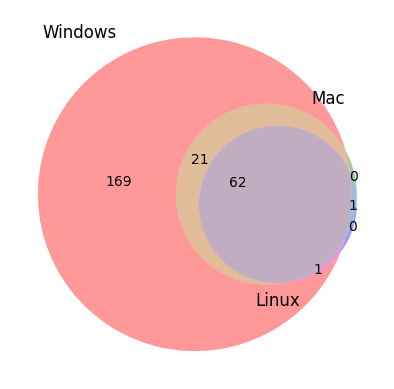

In [ ]:
from matplotlib_venn import venn3

#Calculate the sizes of different intersections and individual sets
windows_size_topDev = (include_top_dev["platforms"] == 'windows').sum()
mac_size_topDev = (include_top_dev["platforms"] == 'mac').sum()
linux_size_topDev = (include_top_dev["platforms"] == 'linux').sum()
windows_mac_size_topDev = (include_top_dev["platforms"] == 'windows;mac').sum()
windows_linux_size_topDev = (include_top_dev["platforms"] == 'windows;linux').sum()
mac_linux_size_topDev = (include_top_dev["platforms"] == 'mac;linux').sum()
windows_mac_linux_size_topDev = (include_top_dev["platforms"] == 'windows;mac;linux').sum()

# Create a Venn diagram
venn3(subsets=(windows_size_topDev, mac_size_topDev, windows_mac_size_topDev, linux_size_topDev, windows_linux_size_topDev, mac_linux_size_topDev, windows_mac_linux_size_topDev),
      set_labels=('Windows', 'Mac', 'Linux'))

# Show the plot
plt.show()

###Machine-Learning

In [ ]:
#One-hot encoding the 'genres' and 'categories' columns for Machine-Learning
categories_encoded = pd.get_dummies(df['categories'].str.split(';').apply(pd.Series).stack()).groupby(level=0).sum()

genres_encoded = pd.get_dummies(df['genres'].str.split(';').apply(pd.Series).stack()).sum(level=0)

<ipython-input-72-b602c1b93607>:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres_encoded = pd.get_dummies(df['genres'].str.split(';').apply(pd.Series).stack()).sum(level=0)


In [ ]:
#Combining them into df dataframe
df = pd.concat([df,categories_encoded, genres_encoded], axis = 1)

In [ ]:
import statsmodels.api as sm

#Single-player
single_conditions_market = df['categories'].str.contains('Single-player', case=False, na=False)

#Multi-player in general
multi_player_general_market = df['categories'].str.contains('MMO|Multi-player|Shared/Split Screen|Stats|Co-op|Local Multi-Player|Local Co-op|Steam Leaderboards|Online Multi-Player|Stats|Cross-Platform Multiplayer|Online Co-op|MMO', case=False, na=False)

#CONVERT 'Window', 'Mac' and 'Linux' to BINARY
df["windows"] = df["platforms"].str.contains("windows").astype(float)
df["mac"] = df["platforms"].str.contains("mac").astype(float)
df["linux"] = df["platforms"].str.contains("linux").astype(float)

#CONVERT Online, Local, Single-player to BINARY
df['Multiplayer'] = multi_player_general_market.astype(float)
df['single_player'] = single_conditions_market.astype(float)

x = sm.add_constant(df[['Indie', 'Action', 'Casual', 'Adventure',
                        'Strategy','Simulation','RPG','Early Access',
                        'Free to Play','linux','mac',
                        'single_player','Multiplayer','release_year','price','windows',
                        'Steam Achievements', 'Steam Trading Cards', 'Steam Cloud',
              'Full controller support', 'Partial Controller Support',
              'Steam Leaderboards', 'Stats' , 'Includes level editor', 'Steam Workshop', 'Captions available', 'In-App Purchases', 'VR Support', 'Valve Anti-Cheat enabled'
                        ]].astype(float))

e = df['Owner_encoded']

#OLS model
OLS_m = sm.OLS(e, x).fit()

print(OLS_m.summary())

                            OLS Regression Results                            
Dep. Variable:          Owner_encoded   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     686.7
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:32:44   Log-Likelihood:                -42345.
No. Observations:               27075   AIC:                         8.475e+04
Df Residuals:                   27045   BIC:                         8.500e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#####Heat-map

<Axes: >

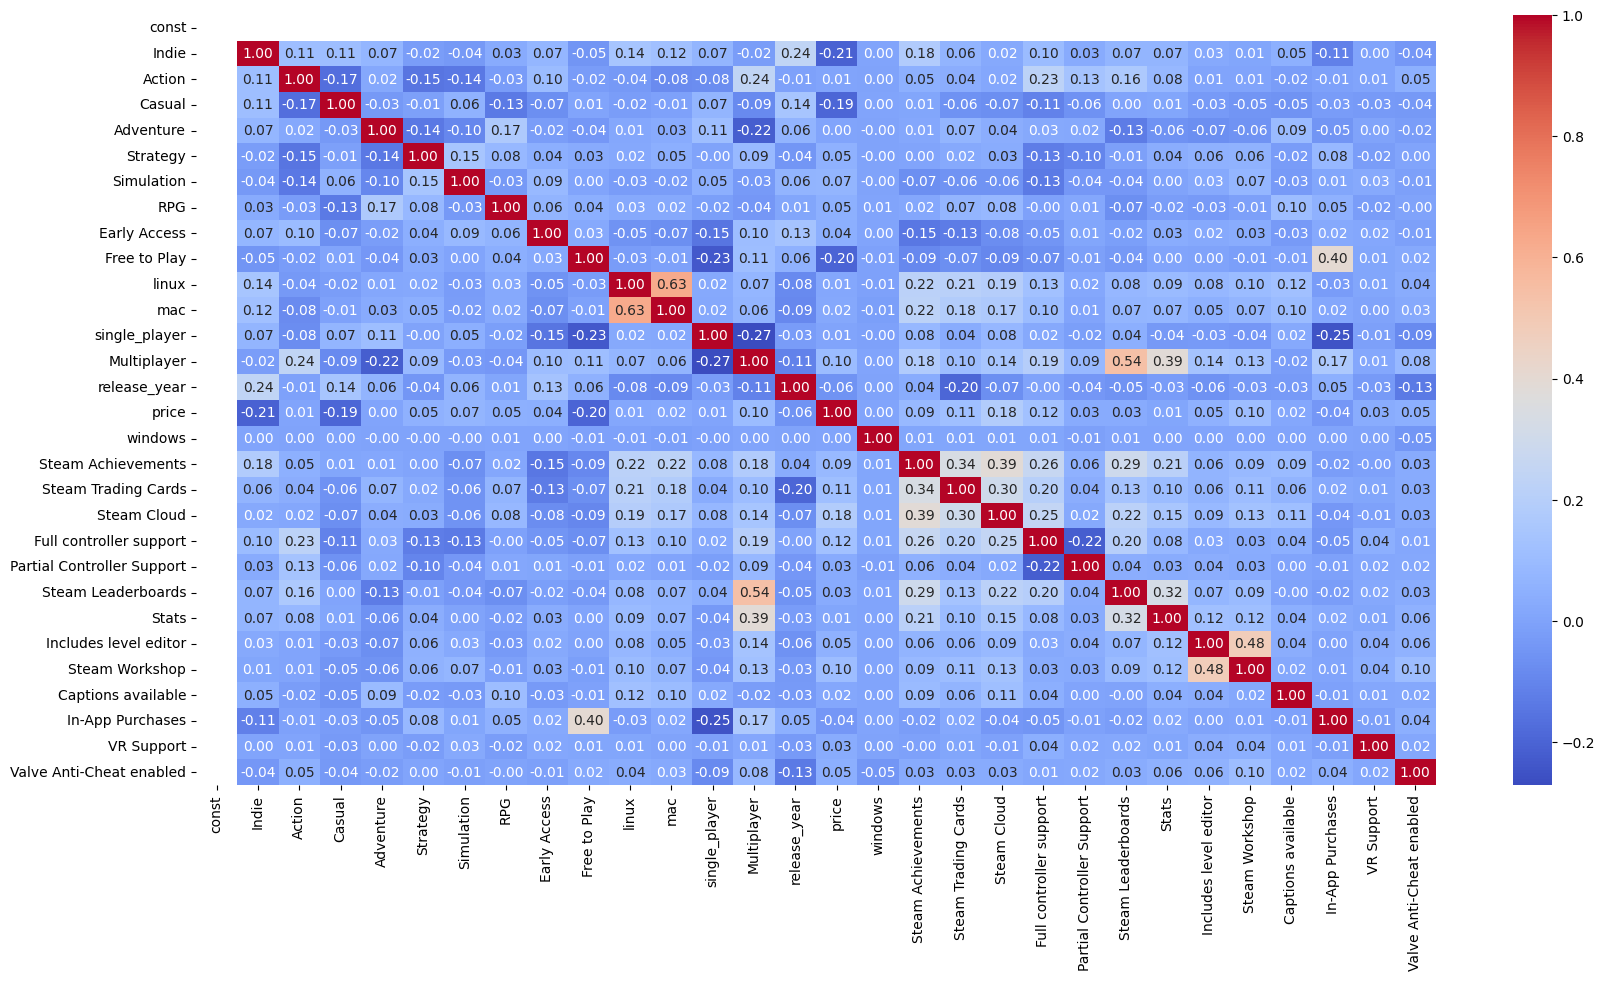

In [ ]:
correlation_matrix = x.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')